<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [3]:
df = pd.read_csv('states_edu.csv')

Chosen test: **Math for Grade 8**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [4]:
# rename columns
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KG',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [6]:
# fill in estimates for enrollment where data is missing
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,122487.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [18]:
df['EDUCATION_EXPENDITURE'] = df['INSTRUCTION_EXPENDITURE'] + df['SUPPORT_SERVICES_EXPENDITURE']
df['EDUCATION_BUDGET'] = df['EDUCATION_EXPENDITURE'] / df['TOTAL_EXPENDITURE']
df['EDUCATION_EXPENDITURE_PER_STUDENT'] = df['EDUCATION_EXPENDITURE'] / df['ENROLL_ALL']

**Final feature list:**
New features were created that describe how much states spend on education in comparison to their total expenditure as well as in comparison to their number of students enrolled. Education expenditure was defined to be the sum of a state's expenditure on instructional and support services for the year.

**Feature selection justification:**
The amount of money spent on education itself is could be highly variable by state and may not be descriptive enough on its own in order to study trends and relationships between predictors and responses. However, when features are modified to represent ratios of expenditure to each states' students or each states' total budgets, I would hypothesize these new features to be better predictors of students' exam scores.

<h2> EDA </h2>

**Visualization 1**

Text(0.5, 1.0, 'Distribution of 8th Grade Math Scores')

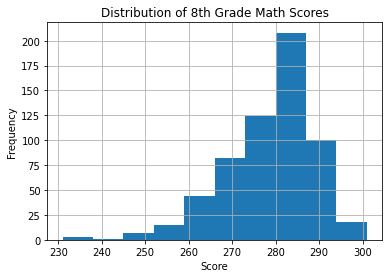

In [21]:
df.AVG_MATH_8_SCORE.hist()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of 8th Grade Math Scores')

Text(0, 0.5, '8th Grade Math Score')

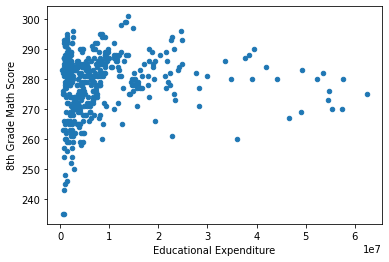

In [24]:
df.plot.scatter(x='EDUCATION_EXPENDITURE',y='AVG_MATH_8_SCORE')
plt.xlabel('Educational Expenditure')
plt.ylabel('8th Grade Math Score')

Text(0, 0.5, '8th Grade Math Score')

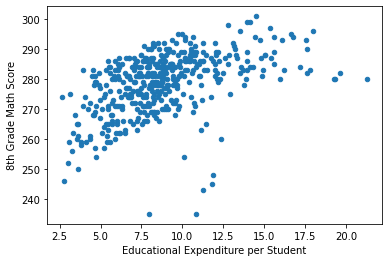

In [22]:
df.plot.scatter(x='EDUCATION_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE')
plt.xlabel('Educational Expenditure per Student')
plt.ylabel('8th Grade Math Score')

The two scatterplots above show that educational expenditure by states is not necessarily a reasonable predictor for students' scores on their 8th grade math exams. Rather, the distribution of these scores appears to match the general distribution of 8th grade math scores when not plotted against states' education expenditures. However, when we use education expenditure per student as a predictor instead of the expenditure itself, we can see that there appears to be a more linear relationship between how much a state spends per student and the students' average 8th grade math scores.

**Visualization 2**

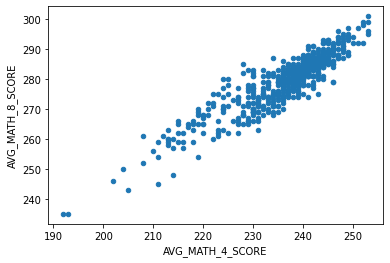

In [14]:
df.plot.scatter(x='AVG_MATH_4_SCORE',y='AVG_MATH_8_SCORE')

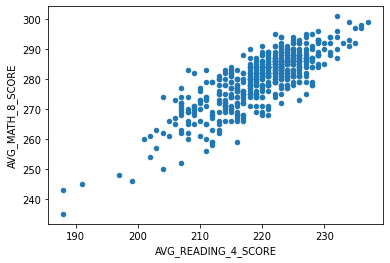

In [15]:
df.plot.scatter(x='AVG_READING_4_SCORE',y='AVG_MATH_8_SCORE')

The scatterplots above aim to describe whether exam scores from elementary schools are good predictors for a student's 8th grade math score. As both relationships appear to follow a positive linear trend, we can conclude that 4th grade scores can act as predictors for students' 8th grade math scores, though 4th grade math scores appear to be a better predictor (as they are more strongly correlated with 8th grade scores) than 4th grade reading scores.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [33]:
from sklearn.model_selection import train_test_split

In [41]:
x = df[['EDUCATION_BUDGET','ENROLL_8','EDUCATION_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [36]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [37]:
# create your model here
model = LinearRegression()

In [43]:
model.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [40]:
y_pred = model.predict(x_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [39]:
# for classification:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

In [ ]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'EDUCATION_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Scores')

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**